# 第一次大作業

根據finance.yahoo.com網站資料，我們考慮樣本期間(2019-01-01)到(2020-11-30)，討論COVID-19期間。根據HW8的結果，我們得到美國與台灣股市報酬率與其匯率報酬率之間的關係，現在我們單純考慮股票市場，題目如下：

1. 請試著對VIX變化量與S&P500指數日報酬率做出敘述統計。
    - 平均數、標準差、偏態、峰態
    - 根據上述結果，討論此兩變數是否符合常態分佈
    - 相關係數，一階自相關係數
    - 根據上述結果，討論此兩變數的資料結構

2. 請試著做出以下分析得到VIX變化量與S&P500指數報酬率的關係為正相關、負相關、無相關。
    - 相關係數
    - 散布圖
    - 迴歸分析

3. 請試著做出以下分析得到S&P500指數股價報酬與移動平均(`MA5`與`MA20`)的關係為正相關、負相關、無相關。
    - 相關係數
    - 散布圖
    - 回歸分析

4. 請利用迴歸分析結果，討論移動平均和VIX報酬率對於S&P500報酬的預測能力。

### 繳交作業注意事項
1. 檔名統一為 "BHW1_學號_班別_姓名"。例如: `BHW1_08151320_經1C_王大明` (扣2分) 
2. 繳交時間為12/30中午12點前 (扣4分)
3. 繳交方式：Moodle的作業區繳交 (扣2分)

In [17]:
# %matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

import seaborn as sns
sns.set_style("darkgrid")

In [18]:
cols = ['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume']
data = pd.read_csv("GSPC.csv")
vix = pd.read_csv("VIX.csv")

data.columns, vix.columns = cols, cols
data['vix_close'] = vix.close

# TODO diff gspc volume
data['dvolume'] = data.volume.diff()
# TODO diff vix cloas
data['dvix'] = data.vix_close.diff()
# TODO gspc return
data['ret'] = data.adjclose.diff() / data.adjclose.shift()

# moving average
ma5 = data.adjclose.rolling(5).mean()
ma20 = data.adjclose.rolling(20).mean()

# 1 請試著對VIX變化量與S&P500指數日報酬率做出敘述統計。

## VIX 變化量 

In [19]:
mean = data.dvix.mean()
print(F"VIX 變化量 平均值：{mean}")
std = data.dvix.std()
print(F"VIX 變化量 標準差：{std}")
skew = data.dvix.skew()
print(F"VIX 變化量 偏態：{skew}")
kurt = data.dvix.kurt()
print(F"VIX 變化量 峰態：{kurt}")
autocorr = data.dvix.autocorr(lag=1)
print(F"VIX 變化量 一階自相關係數：{autocorr}")

VIX 變化量 平均值：-0.004948022869022868
VIX 變化量 標準差：2.743231727349976
VIX 變化量 偏態：2.6109727072318565
VIX 變化量 峰態：27.303495064381252
VIX 變化量 一階自相關係數：-0.32044356607721364


<AxesSubplot:ylabel='dvix'>

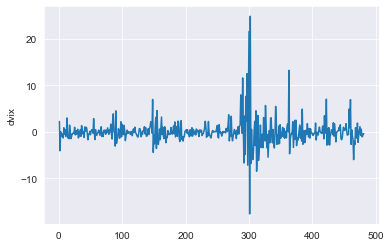

In [20]:
sns.lineplot(data=data.dvix)

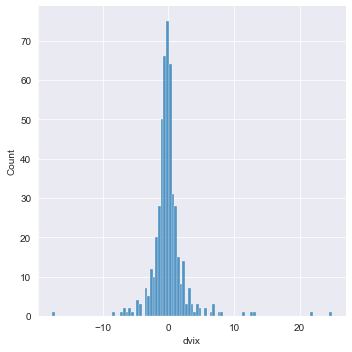

In [21]:
sns.displot(data=data.dvix)

1. 由於 VIX 變化量的偏態係數不等於零，因此不是呈現常態分佈。
2. 由於 VIX 變化量的一階自相關係數絕對值小於 0.5，表示資料本身的自我相關是低度相關，適合與其他資料做迴歸分析。 
3. 從 lineplot 來看，VIX 變化量本身沒有明顯的週期性變化，與一階自我相關係數吻合。
4. 從 distribution plot 來看，雖然數據顯示資料偏向右邊，但整體的分佈相當接近常態分佈的鐘型曲線。
5. 由於峰態相當的大，也可以從圖上看出在平均值的附近的波鋒相當的高聳。

## S&P500 報酬率

In [22]:
mean = data.ret.mean()
print(F"S&P500 報酬率平均值：{mean}")
std = data.ret.std()
print(F"S&P500 報酬率標準差：{std}")
skew = data.ret.skew()
print(F"S&P500 報酬率偏態：{skew}")
kurt = data.ret.kurt()
print(F"S&P500 報酬率峰態：{kurt}")
autocorr = data.ret.autocorr(lag=1)
print(F"S&P500 報酬率一階自相關係數：{autocorr}")

S&P500 報酬率平均值：0.0009119886392381388
S&P500 報酬率標準差：0.01667012263282266
S&P500 報酬率偏態：-0.6808926560951445
S&P500 報酬率峰態：13.616629424730824
S&P500 報酬率一階自相關係數：-0.3240680912912369


<AxesSubplot:ylabel='ret'>

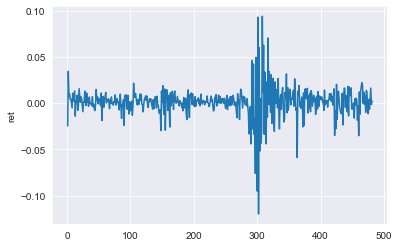

In [23]:
sns.lineplot(data=data.ret)

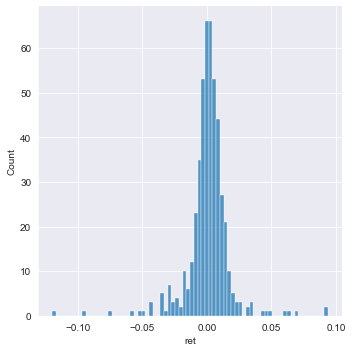

In [24]:
sns.displot(data=data.ret)

1. 由於 S&P500 報酬率的偏態係數不等於零，因此不是呈現常態分佈，但與 VIX 變化量的分佈相比更接近常態分佈。
2. 由於 S&P500 報酬率的一階自相關係數絕對值小於 0.5，表示資料本身的自我相關是低度相關，適合與其他資料做迴歸分析。 
3. 從 lineplot 來看，S&P500 報酬率本身沒有明顯的週期性變化，與一階自我相關係數吻合。
4. 從 distribution plot 來看，雖然數據顯示資料偏向右邊，但整體的分佈相當接近常態分佈的鐘型曲線。
5. 由於峰態相當的大，也可以從圖上看出在平均值的附近的波鋒相當的高聳。

# 2 請試著做出以下分析得到VIX變化量與S&P500指數報酬率的關係為正相關、負相關、無相關。

## 相關係數

In [25]:
corr = data.ret.corr(data.dvix)
print(F"VIX 變化量與 S&P500 報酬率的相關係數：{corr}, 呈現高度負相關")

VIX 變化量與 S&P500 報酬率的相關係數：-0.7989938418142579, 呈現高度負相關


## 散佈圖

從散佈圖可以看出隨著投資人恐慌指數越高，S&P500的報酬率隨之降低，呈現負相關。


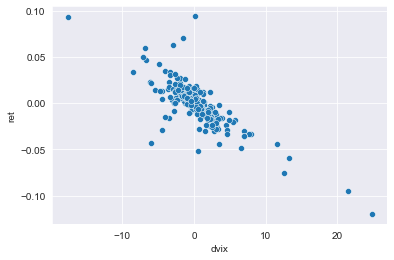

In [26]:
sns.scatterplot(data.dvix, data.ret)
print(F"從散佈圖可以看出隨著投資人恐慌指數越高，S&P500的報酬率隨之降低，呈現負相關。")

## 迴歸分析 

In [27]:
data["const"] = 1
x1 = ["const", "dvix"]
reg_normal = sm.OLS(data["ret"], data[x1], missing="drop").fit()
print(reg_normal.summary())
print("******************************************************************************\n")
print(">>> 從一般迴歸分析結果來看，dvix 的一次係數 p value 小於 0.001，表示對於負相關的結果是強烈顯著\n且從 R-squared 來看高達 63.8% 也驗證了 dvix 的重要性。")
print("\n\n\n")
reg_new = sm.OLS(data["ret"], data[x1], missing="drop").fit(cov_type="HAC", cov_kwds={"maxlags":5})
print(reg_new.summary())
print("******************************************************************************\n")
print(">>> 從 Newey-West 調整的分析結果來看，dvix 的一次係數 p value 仍然小於 0.001，表示對於負相關的結果依然是強烈顯著。")

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     845.6
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          7.19e-108
Time:                        22:08:22   Log-Likelihood:                 1531.9
No. Observations:                 481   AIC:                            -3060.
Df Residuals:                     479   BIC:                            -3051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.000      1.941      0.0

# 3 請試著做出以下分析得到S&P500指數股價報酬與移動平均(`MA5`與`MA20`)的關係為正相關、負相關、無相關。

# 相關係數

In [28]:
corr_ma5 = data.ret.corr(ma5)
print(F"S&P500 的五日平均與 S&P500 報酬率的相關係數：{corr_ma5}, 呈現低度負相關")

corr_ma20 = data.ret.corr(ma20)
print(F"S&P500 的二十日平均與 S&P500 報酬率的相關係數：{corr_ma20}, 呈現低度負相關")

S&P500 的五日平均與 S&P500 報酬率的相關係數：-0.042457625733669624, 呈現低度負相關
S&P500 的二十日平均與 S&P500 報酬率的相關係數：-0.07135945909016145, 呈現低度負相關


# 散佈圖

從散佈圖可以看出五日平均與 S&P500 報酬率沒有明顯的相關性。

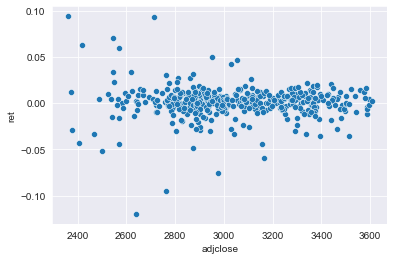

In [29]:
sns.scatterplot(ma5, data.ret)
print(F"從散佈圖可以看出五日平均與 S&P500 報酬率沒有明顯的相關性。")

從散佈圖可以看出二十日平均與 S&P500 報酬率沒有明顯的相關性。


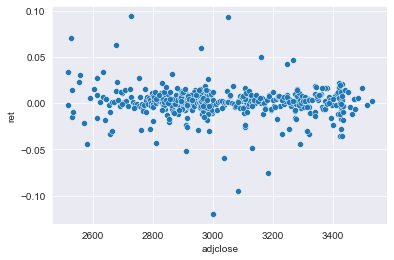

In [30]:
sns.scatterplot(ma20, data.ret)
print(F"從散佈圖可以看出二十日平均與 S&P500 報酬率沒有明顯的相關性。")

## MA5

In [31]:
x1 = ["const", "ma5"]
ma5.name = "ma5"
f_ma5 = ma5.to_frame()
f_ma5["const"] = 1
reg_normal = sm.OLS(data["ret"], f_ma5[x1], missing="drop").fit()
print(reg_normal.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8596
Date:                Sat, 26 Dec 2020   Prob (F-statistic):              0.354
Time:                        22:08:22   Log-Likelihood:                 1281.5
No. Observations:                 478   AIC:                            -2559.
Df Residuals:                     476   BIC:                            -2551.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0092      0.009      1.022      0.3

## MA20

In [32]:
x1 = ["const", "ma20"]
ma20.name="ma20"
f_ma20 = ma20.to_frame()
f_ma20["const"] = 1
reg_normal = sm.OLS(data["ret"], f_ma20[x1], missing="drop").fit()
print(reg_normal.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.360
Date:                Sat, 26 Dec 2020   Prob (F-statistic):              0.125
Time:                        22:08:22   Log-Likelihood:                 1236.0
No. Observations:                 463   AIC:                            -2468.
Df Residuals:                     461   BIC:                            -2460.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0163      0.010      1.614      0.1

# 4  請利用迴歸分析結果，討論移動平均和VIX報酬率對於S&P500報酬的預測能力。

從 MA5, MA20, dvix 三者的回歸分析來看，MA5 與 MA20 的 p value 遠大於 0.01 且相關係數相較於 dvix 是相當小
對於 S&P500 的日報酬分析而言，恐慌指數的預測能力遠大於移動平均線的預測能力！